In [1]:
%load_ext autoreload
%autoreload 2

# Pharmacophore

In [2]:
import openpharmacophore as oph
import pyunitwizard as puw
import nglview as nv

## Building a pharmacophoric model by hand

In [3]:
pharmacophore = oph.Pharmacophore()

center = puw.quantity([0,0,0], 'nm')
radius = puw.quantity(1.0, 'nm')
element = oph.pharmacophoric_elements.PositiveChargeSphere(center, radius)
pharmacophore.add_element(element)

center = puw.quantity([-3,1,0], 'nm')
radius = puw.quantity(1.0, 'nm')
element = oph.pharmacophoric_elements.NegativeChargeSphere(center, radius)
pharmacophore.add_element(element)

center = puw.quantity([3,-1,-1], 'nm')
radius = puw.quantity(1.0, 'nm')
direction = [-1,-1,-2]
element = oph.pharmacophoric_elements.HBAcceptorSphereAndVector(center, radius, direction)
pharmacophore.add_element(element)

center = puw.quantity([1,1,3], 'nm')
sigma = puw.quantity(1.0, 'nm')
element = oph.pharmacophoric_elements.HydrophobicGaussianKernel(center, sigma)
pharmacophore.add_element(element)

center = puw.quantity([-2,-3,0], 'nm')
radius = puw.quantity(1.5, 'nm')
element = oph.pharmacophoric_elements.AromaticRingSphere(center, radius)
pharmacophore.add_element(element)

In [4]:
pharmacophore.n_elements

5

In [5]:
pharmacophore.elements

{<openpharmacophore.pharmacophoric_elements.aromatic_ring.AromaticRingSphere at 0x7fa33284a1d0>,
 <openpharmacophore.pharmacophoric_elements.positive_charge.PositiveChargeSphere at 0x7fa332843110>}

In [6]:
view = nv.NGLWidget()
pharmacophore.add_to_NGLView(view)
view.control.zoom(0.8)
view

NGLWidget()

In [7]:
view.render_image()

Image(value=b'', width='99%')

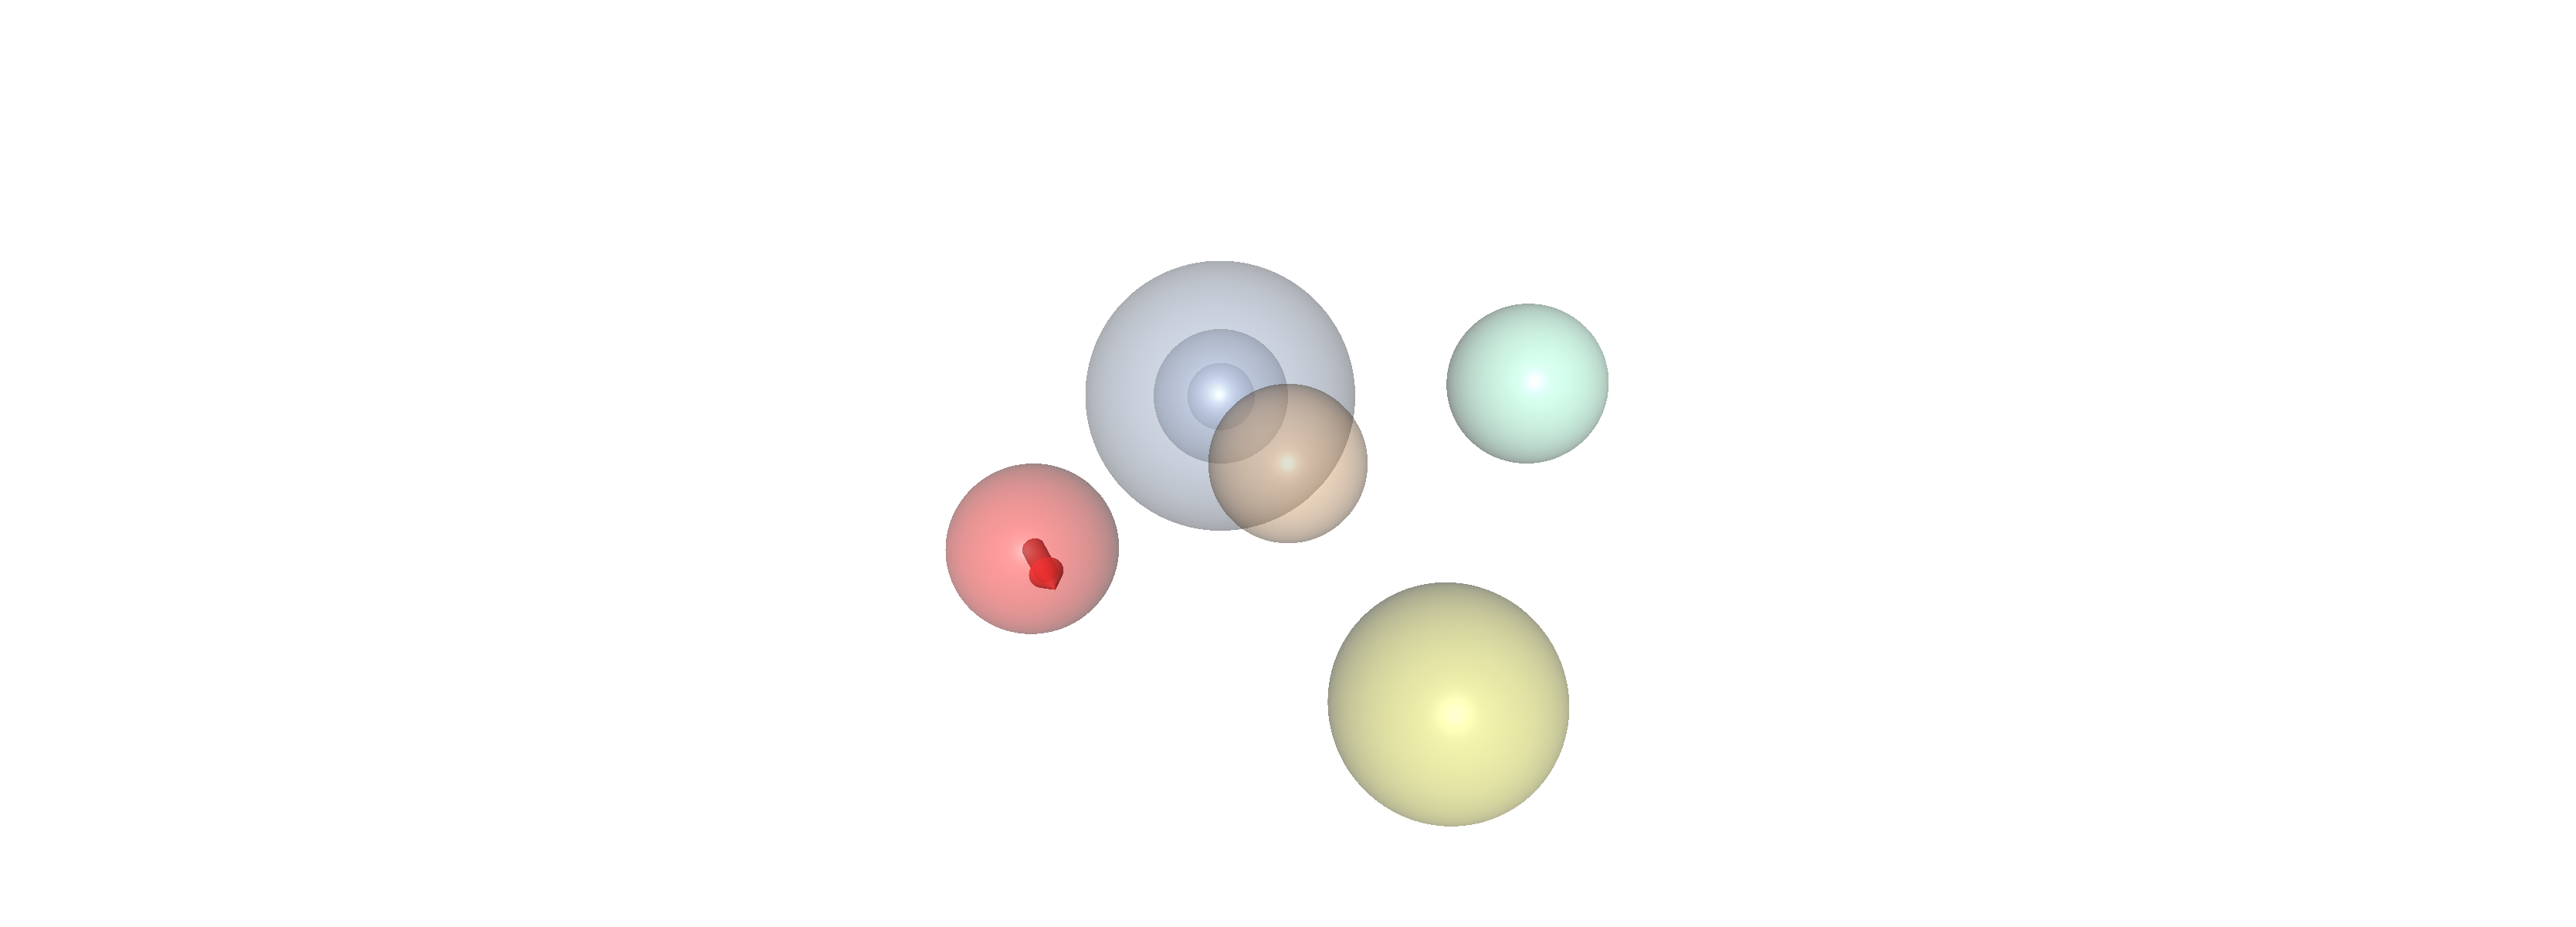

In [8]:
view._display_image()

## Importing pharmacophoric models

In [9]:
file = oph.demo.pharmacophore_pharmer_file

In [15]:
pharmacophore = oph.Pharmacophore(file, form='pharmer') #in the future oph has to autodetect the form

NotImplementedError: It has not been implemeted yet. Write a new issue in https://github.com/uibcdf/MolSysMT/issues asking for it.

In [ ]:
pharmacophore.elements

In [ ]:
pharmacophore.show()

## Exporting pharmacophoric models

In [ ]:
pharmacophore.to_pharmer(file_name='pharmacophore.json')